In [1]:
from fastai2.vision.all import *
from utils import *

In [2]:
path = untar_data(URLs.IMAGENETTE)

In [25]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = dblock.dataloaders(path, bs=64)

In [26]:
model=resnet18()
learn = Learner(dls, model, loss_func= CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.579426,1.287218,0.569455,28:18


In [27]:
x,y=dls.one_batch()
x.mean(dim=[0,2,3]),x.std(dim=[0,2,3])

(TensorImage([0.4782, 0.4613, 0.4410]), TensorImage([0.2867, 0.2894, 0.3050]))

In [28]:
#im=x[0]
#show_image(im)
#im.mean(dim=[0,1,2]), im.std(dim=[0,1,2])

In [3]:
def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.75),
                               Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(path, bs=bs)

In [4]:
dls=get_dls(64,224)

In [17]:
x,y=dls.one_batch()
x.mean(dim=[0,2,3]),x.std(dim=[0,2,3])

(TensorImage([0.0076, 0.0985, 0.1685]), TensorImage([1.2764, 1.2730, 1.3175]))

In [31]:
model = xresnet18()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.446041,1.199214,0.624720,34:12


In [4]:
dls = get_dls(128, 128)

In [32]:

learn = Learner(dls, xresnet18(), loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy)
learn.fit_one_cycle(2, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.854268,1.262705,0.582524,14:34
1,1.112897,0.872555,0.722181,14:41


In [33]:
learn.dls = get_dls(64, 224)
learn.fine_tune(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.974238,0.972790,0.683719,34:50


epoch,train_loss,valid_loss,accuracy,time
0,0.818131,0.720649,0.771471,35:28
1,0.704217,0.626576,0.794996,35:32


In [34]:
preds,targs = learn.tta()
accuracy(preds, targs).item()


0.802091121673584

In [71]:
church = PILImage.create(get_image_files_sorted(path/'train'/'n03028079')[0])
gas = PILImage.create(get_image_files_sorted(path/'train'/'n03425413')[0])
church = church.resize((256,256))
gas = gas.resize((256,256))
tchurch = tensor(church).float() / 255.   #convert image to tensor 
tgas = tensor(gas).float() / 255.

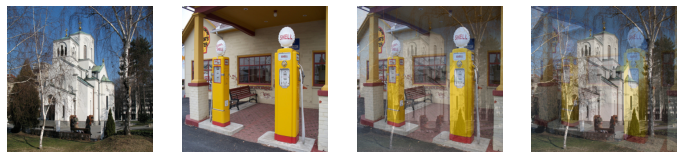

In [80]:
_,axs = plt.subplots(1,4, figsize=(12,4))
show_image(tchurch,ax=axs[0])
show_image(tgas, ax=axs[1])
show_image(0.3*tchurch+0.7*tgas, ax=axs[2])
show_image(0.7*tchurch+0.3*tgas, ax=axs[3])

In [37]:
model = xresnet50()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy, cbs=Mixup)
learn.fit_one_cycle(5, 3e-3)

NameError: name 'Mixup' is not defined

In [ ]:
model = xresnet18()
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.550897,2.397567,0.519417,33:45
1,2.097980,2.244025,0.592606,33:55
2,1.839634,1.854820,0.699776,33:59


In [ ]:
#http://35.185.248.178:8888/view/fastai2/13/tutorial.imagenette.html
#http://35.185.248.178:8888/notebooks/fastai2/12/19_callback.mixup.ipynb